2) Check out the Jupyter notebook for Chapter 4 at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb. Then, for the task "Classifying movie reviews: A binary classification example", tune the hyper-parameters of the model (such as changing the number of layers, changing the sizes of layers, changing the optimizer, changing the learning rate, etc.), and see if you can improve the model's performance. Submit a Jupyter notebook where you clearly show the code with the best hyper-parameters that you have found, along with its performance on training, validation and test sets. (10 points)

Loading the IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
opt = keras.optimizers.Adamax(learning_rate=0.0008)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

Compiling the model

In [ ]:
model.compile(optimizer="adamax",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 3s 81ms/step - loss: 0.6300 - accuracy: 0.6539 - val_loss: 0.5403 - val_accuracy: 0.8037
Epoch 2/30
30/30 [==============================] - 2s 58ms/step - loss: 0.5009 - accuracy: 0.7950 - val_loss: 0.4407 - val_accuracy: 0.8527
Epoch 3/30
30/30 [==============================] - 1s 45ms/step - loss: 0.4190 - accuracy: 0.8435 - val_loss: 0.3788 - val_accuracy: 0.8698
Epoch 4/30
30/30 [==============================] - 1s 51ms/step - loss: 0.3626 - accuracy: 0.8703 - val_loss: 0.3408 - val_accuracy: 0.8783
Epoch 5/30
30/30 [==============================] - 2s 59ms/step - loss: 0.3176 - accuracy: 0.8896 - val_loss: 0.3168 - val_accuracy: 0.8823
Epoch 6/30
30/30 [==============================] - 2s 53ms/step - loss: 0.2857 - accuracy: 0.9015 - val_loss: 0.3008 - val_accuracy: 0.8863
Epoch 7/30
30/30 [==============================] - 1s 42ms/step - loss: 0.2602 - accuracy: 0.9113 - val_loss: 0.2928 - val_accuracy: 0.8900
Epoch 8/30
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

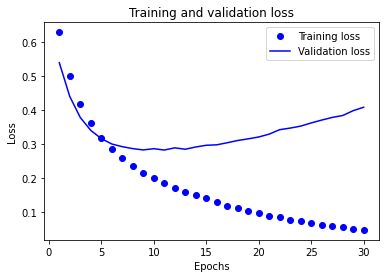

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting the training and validation accuracy

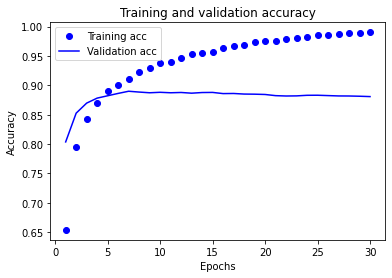

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining a model from scratch

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adamax",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=7, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/7
49/49 [==============================] - 2s 35ms/step - loss: 0.6169 - accuracy: 0.6824
Epoch 2/7
49/49 [==============================] - 2s 32ms/step - loss: 0.4580 - accuracy: 0.8217
Epoch 3/7
49/49 [==============================] - 2s 37ms/step - loss: 0.3616 - accuracy: 0.8678
Epoch 4/7
49/49 [==============================] - 2s 45ms/step - loss: 0.3044 - accuracy: 0.8910
Epoch 5/7
49/49 [==============================] - 2s 39ms/step - loss: 0.2687 - accuracy: 0.9057
Epoch 6/7
49/49 [==============================] - 2s 32ms/step - loss: 0.2419 - accuracy: 0.9154
Epoch 7/7
782/782 [==============================] - 3s 3ms/step - loss: 0.2757 - accuracy: 0.8894


In [ ]:
results

[0.27571865916252136, 0.8894000053405762]

Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.15008962],
       [0.99604666],
       [0.9364439 ],
       ...,
       [0.08840391],
       [0.05727796],
       [0.52431846]], dtype=float32)

I've tried to train the neural network using different hyperparameters, however this particualr neural network having the following properties:
1. 5 layers
2. 2 dense layers with 16 neurons with relu activation function, 2 dropout layers having 0.2 dropout ratio, and last layer with 1 neuron having sigmoid activation function
3. Adamax optimizer
4. Trained for 7 epochs

gives the maximum model accuracy of 88.94 percent.
The original model given in this exercise has a model accuracy of 88.85 percent.

So, we improved the model accuracy by 0.1 percent.
